In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Users\HP\Desktop\60-Days-Challange\Project3\sms_spam.csv")
df.sample(10)

,type,text
170,ham,Yes :)it completely in out of form:)clark also...
293,ham,Oops. 4 got that bit.
50,ham,What you thinked about me. First time you saw ...
3965,ham,"If e timing can, then i go w u lor..."
4848,ham,I am in escape theatre now. . Going to watch K...
1425,ham,Yes.. now only saw your message..
1611,ham,I'll probably be around mu a lot
1081,ham,You tell what happen dont behave like this to ...
648,spam,PRIVATE! Your 2003 Account Statement for shows...
4211,ham,No da:)he is stupid da..always sending like th...


In [9]:
df.columns

Index(['type', 'text'], dtype='object')

<Axes: xlabel='type'>

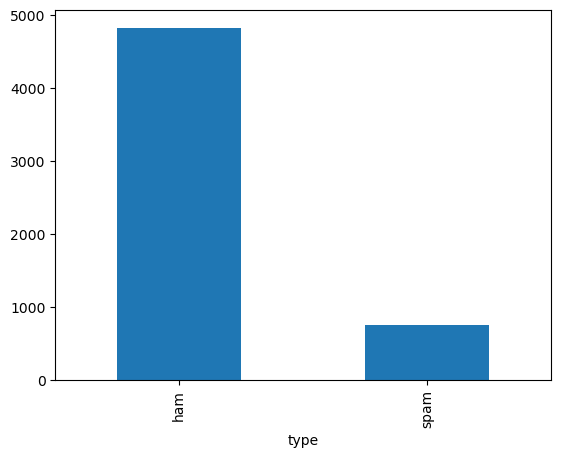

In [11]:
df["type"].value_counts().plot(kind="bar")

In [12]:
#although spam message are less keep in mind

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["type"] = encoder.fit_transform(df["type"])
df["type"].sample(10)

385     1
1321    0
5049    0
4721    0
4842    0
2547    0
5263    0
1149    0
296     1
1003    0
Name: type, dtype: int64

In [18]:
df.head(10)

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [19]:
#preprocess the data
!pip install nltk

In [31]:
#chatwords 
chat_words_dict = {
    "hello": "A greeting or expression of goodwill",
    "brb": "Be right back",
    "lol": "Laugh out loud",
    "omg": "Oh my God",
    "idk": "I don't know",
    "btw": "By the way",
    "gtg": "Got to go",
    "ttyl": "Talk to you later",
    "np": "No problem",
    "thx": "Thanks",
    "yw": "You're welcome",
    "imo": "In my opinion",
    "fyi": "For your information",
    "asap": "As soon as possible",
    "bff": "Best friends forever",
    "tbh": "To be honest",
    "smh": "Shaking my head",
    "afaik": "As far as I know",
    "irl": "In real life",
    "dm": "Direct message",
    "rofl": "Rolling on the floor laughing",
    "lmao": "Laughing my ass off",
    "bbl": "Be back later",
    "gr8": "Great",
    "jk": "Just kidding",
    "nvm": "Never mind",
    "omw": "On my way",
    "ppl": "People",
    "pls": "Please",
    "thx": "Thanks",
    "u": "You",
    "ur": "Your",
    "w/e": "Whatever",
    "w/o": "Without",
    "w8": "Wait",
    "xoxo": "Hugs and kisses",
    "yolo": "You only live once",
    "b4": "Before",
    "cya": "See you",
    "ez": "Easy",
    "faq": "Frequently asked questions",
    "ftw": "For the win",
    "gg": "Good game",
    "gl": "Good luck",
    "hf": "Have fun",
    "hmu": "Hit me up",
    "ic": "I see",
    "imo": "In my opinion",
    "irl": "In real life",
    "jk": "Just kidding",
    "k": "Okay",
    "lmk": "Let me know",
    "msg": "Message",
    "n/a": "Not applicable",
    "np": "No problem",
    "omg": "Oh my God",
    "plz": "Please",
    "q": "Question",
    "r": "Are",
    "rn": "Right now",
    "sry": "Sorry",
    "tba": "To be announced",
    "tbd": "To be decided",
    "tgif": "Thank God it's Friday",
    "thx": "Thanks",
    "ttyl": "Talk to you later",
    "u": "You",
    "ur": "Your",
    "w/": "With",
    "w/o": "Without",
    "w8": "Wait",
    "xoxo": "Hugs and kisses",
    "yolo": "You only live once",
    "b4": "Before",
    "cya": "See you",
    "ez": "Easy",
    "faq": "Frequently asked questions",
    "ftw": "For the win",
    "gg": "Good game",
    "gl": "Good luck",
    "hf": "Have fun",
    "hmu": "Hit me up",
    "ic": "I see",
    "imo": "In my opinion",
    "irl": "In real life",
    "jk": "Just kidding",
    "k": "Okay",
    "lmk": "Let me know",
    "msg": "Message",
    "n/a": "Not applicable",
    "np": "No problem",
    "omg": "Oh my God",
    "plz": "Please",
    "q": "Question",
    "r": "Are",
    "rn": "Right now",
    "sry": "Sorry",
    "tba": "To be announced",
    "tbd": "To be decided",
    "tgif": "Thank God it's Friday",
    "thx": "Thanks",
    "ttyl": "Talk to you later",
    "u": "You",
    "ur": "Your",
    "w/": "With",
    "w/o": "Without",
    "w8": "Wait",
    "xoxo": "Hugs and kisses",
    "yolo": "You only live once"
}
chat_words_dict

{'hello': 'A greeting or expression of goodwill',
 'brb': 'Be right back',
 'lol': 'Laugh out loud',
 'omg': 'Oh my God',
 'idk': "I don't know",
 'btw': 'By the way',
 'gtg': 'Got to go',
 'ttyl': 'Talk to you later',
 'np': 'No problem',
 'thx': 'Thanks',
 'yw': "You're welcome",
 'imo': 'In my opinion',
 'fyi': 'For your information',
 'asap': 'As soon as possible',
 'bff': 'Best friends forever',
 'tbh': 'To be honest',
 'smh': 'Shaking my head',
 'afaik': 'As far as I know',
 'irl': 'In real life',
 'dm': 'Direct message',
 'rofl': 'Rolling on the floor laughing',
 'lmao': 'Laughing my ass off',
 'bbl': 'Be back later',
 'gr8': 'Great',
 'jk': 'Just kidding',
 'nvm': 'Never mind',
 'omw': 'On my way',
 'ppl': 'People',
 'pls': 'Please',
 'u': 'You',
 'ur': 'Your',
 'w/e': 'Whatever',
 'w/o': 'Without',
 'w8': 'Wait',
 'xoxo': 'Hugs and kisses',
 'yolo': 'You only live once',
 'b4': 'Before',
 'cya': 'See you',
 'ez': 'Easy',
 'faq': 'Frequently asked questions',
 'ftw': 'For the w

In [50]:
# #chatword treatment 
from nltk.corpus import stopwords
# stopwords.words("english")
# def chatwordTreatment(text):
#         corpus=[]
#         for i in text.split():
#             if i in chat_words_dict:
#                 corpus.append(chat_words_dict[i])
#             else:
#                 corpus.append(i)
#         return " ".join(corpus)
# text="lmao I AM CALLING YOU @FROM HEALTH CARE BENEFIT @salam a#abdul bhai"
# text = chatwordTreatment(text)
# print(text)

import nltk
def removeStopwords(text):
    corpas=[]
    for word in text.split():
        if word not in stopwords.words("english"):
              corpas.append(word)
        else:
            pass
    return " ".join(corpas)

text = "my name is waris hayat from google engineer"
nltk.download('stopwords')
print(removeStopwords(text))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


name waris hayat google engineer


In [39]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   -------------------------------------- 624.3/624.3 kB 828.7 kB/s eta 0:00:00


In [ ]:
from nltk.stem import PorterStemmer
import string as st
from nltk.corpus import stopwords
from textblob import TextBlob
def preprocess_sentense(text):

    text = text.lower()  #convert textt into lower

    #remove punctuation
    text =  "".join(filter(lambda char:char not in st.punctuation,text))

    #spellling correction
    incorrect_sentence=text

    correctcion = TextBlob(incorrect_sentence)

    text=correctcion.correct().string 

    



    return "".join(text)
preprocess_sentense("lmao I AM CALLNG YOU @FROM HaeLTH CARE BENEFIT @salam a#abdul bhai")

'may i am calling you from health care benefit slam aabdul that'

In [ ]:
#